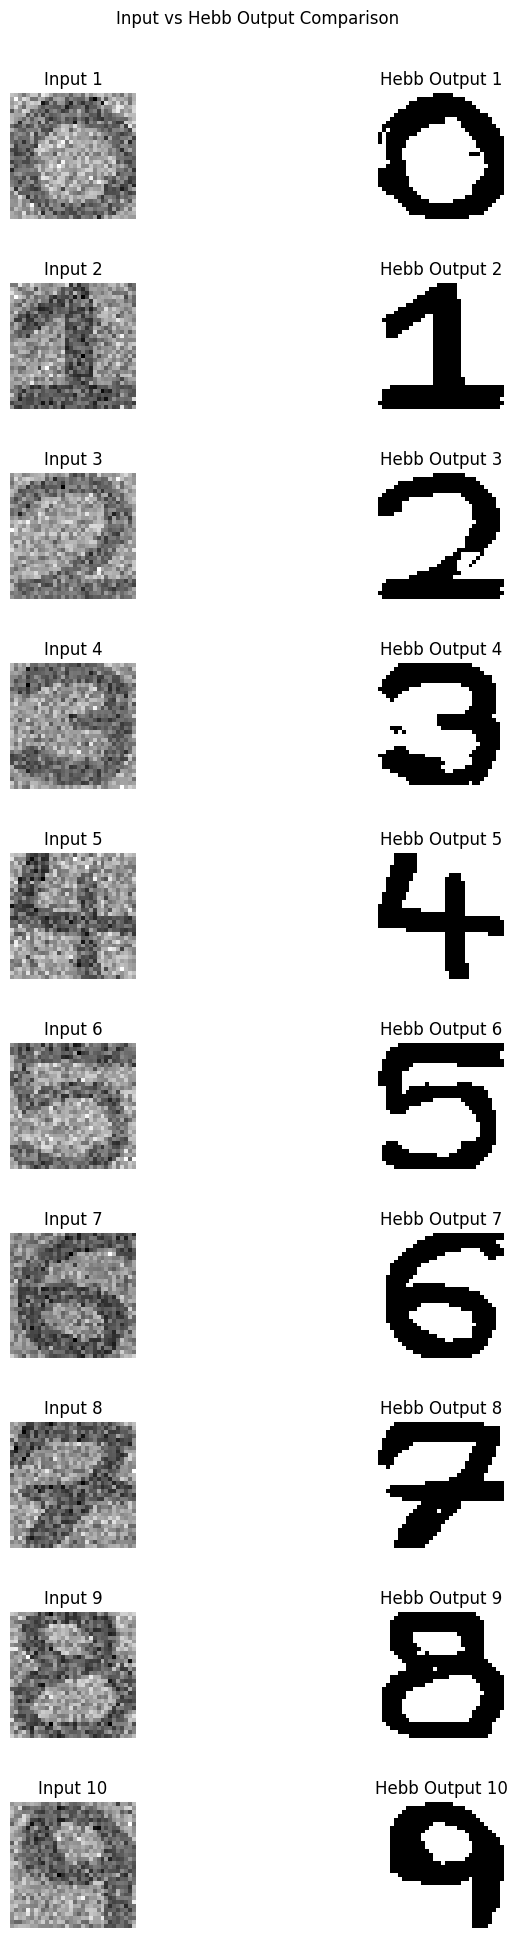

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
class Hopfield:
    def __init__(self, input_size, number_of_classes):
        # input_size: the size of features
        self.input_size = input_size
        # number_of_classes: number of patterns or memories to store
        self.number_of_classes = number_of_classes

    def forward(self, x):
        # Forward pass through the network
        y = np.sign(x @ self.w)
        return y
        # x: input vector
    def Train(self, x):
        # Hebb's learning rule
        # Update the weight matrix based on the outer product of the patterns
        self.w = np.mean(np.expand_dims(x,axis = 2) * np.expand_dims(x,axis = 1) , axis = 0)
        # Zeroing the diagonal elements of the weight matrix
        self.w = self.w * (np.ones(self.w.shape) - np.eye(self.w.shape[0]))
        # This step prevents a neuron from having a connection with itself

N = 1024  # Presumed size of each input vector
P = 10  # Number of patterns (or classes, possibly digits 0-9)

x = []  # Initialize an empty list to store the patterns
for i in range(P):
    # Read each image from a directory named 'digits'
    img = cv2.imread('digits/'+str(i)+'.jpg')  # Load the image for digit 'i'

    # Convert the image to grayscale
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Convert the grayscale image to a binary image (-1 for dark pixels, 1 for light pixels)
    binary_image = np.where(img_gray < 128, -1, 1)

    # Append the processed binary image to the list of patterns
    x.append(binary_image)

# Convert the list of patterns to a NumPy array and reshape
x = np.asarray(x).reshape([P, -1])

# Update the input size N based on the reshaped array's second dimension
N = x.shape[1]
# Initialize an instance of the Hopfield network with the specified input size and number of patterns
model_Hebb = Hopfield(N ,P)
# Train the Hopfield network using the preprocessed images
model_Hebb.Train(x)

# Assuming P, x, and model_Hebb are defined elsewhere in your code

plt.figure(figsize=(10, 2 * P))

for i in range(P):
    # Adding noise to the pattern
    noise = np.random.normal(0, 1, x.shape[1])
    y = x[i] + noise

    # Plotting the noisy input
    plt.subplot(P, 2, i * 2 + 1)
    plt.imshow(y.reshape([32, 32]), cmap='gray')
    plt.title(f'Input {i+1}')
    plt.axis('off')

    # Getting the output from the Hopfield network and plotting
    y_hat_Hebb = model_Hebb.forward(y)
    plt.subplot(P, 2, i * 2 + 2)
    plt.imshow(y_hat_Hebb.reshape([32, 32]), cmap='gray')
    plt.title(f'Hebb Output {i+1}')
    plt.axis('off')

plt.suptitle('Input vs Hebb Output Comparison')
plt.tight_layout(pad=3.0)
plt.savefig('All.png', dpi=1000)



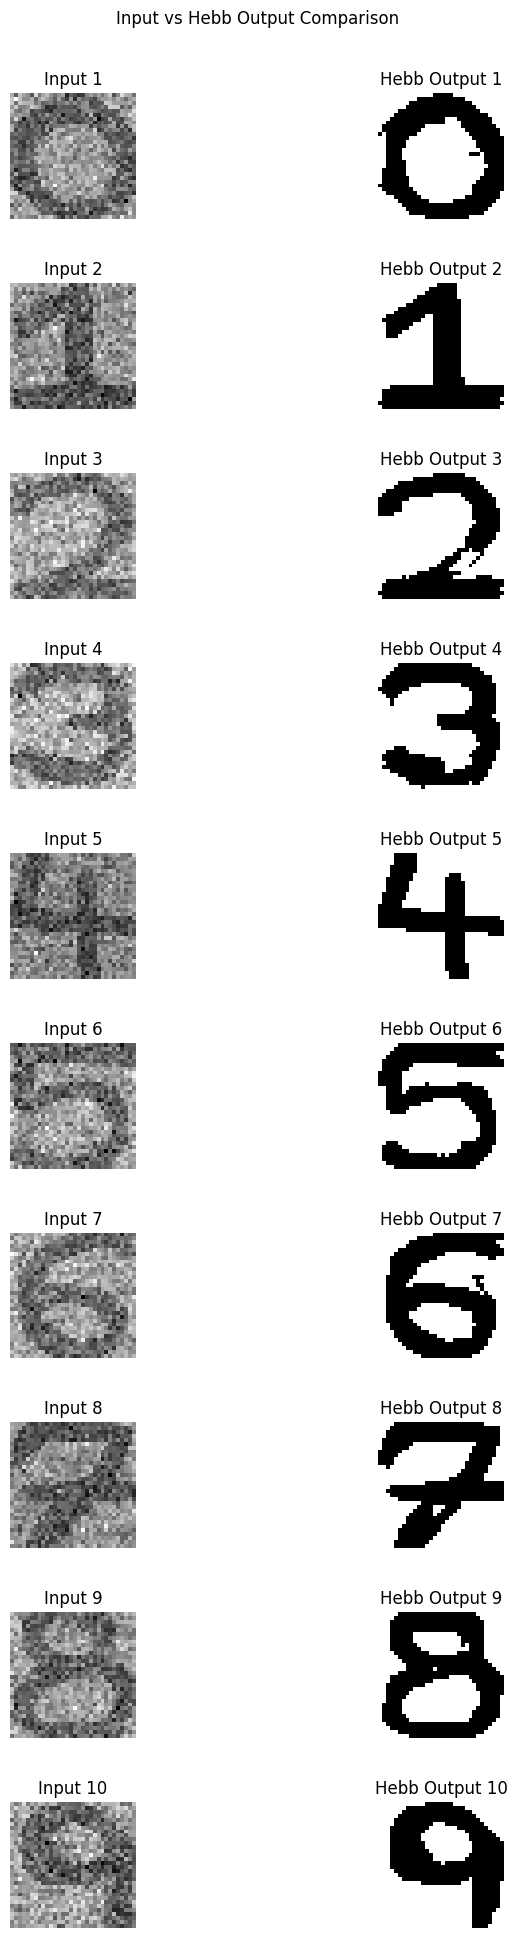